# Vanishing/Exploding Gradients Problem

خب در این notebbok قراره  روی موضوغ Vanishing/Explofing  Gradient Problem 

اول به توضبخ مخصتر که چرا داره این اتفاق می افته 

<div style="direction: rtl; text-align: justify; font-family: 'Tahoma', 'Arial'; line-height: 1.8; color: #2c3e50;">

<div style="background-color: #f0f7ff; padding: 20px; border-right: 8px solid #3498db; border-radius: 10px; margin-bottom: 20px; box-shadow: 2px 2px 5px rgba(0,0,0,0.05);">
    <h2 style="color: #2980b9; margin-top: 0;">📉 محوشدن گرادیان (Vanishing Gradient)</h2>
    <p>
    در شبکه‌های عمیق با تابع فعال‌سازی <b>سیگموید</b>، مشتق تابع حداکثر <b>۰.۲۵</b> است. با ضرب شدن این مقادیر کوچک در لایه‌های مختلف (طبق قانون زنجیره‌ای)، گرادیان به عددی نزدیک صفر می‌رسد و اصطلاحاً «محو» می‌شود. 
    </p>
    <p style="font-style: italic; color: #34495e;">
    <b>نتیجه:</b> وزن‌های لایه‌های اولیه به‌روزرسانی نمی‌شوند و شبکه عملاً قادر به یادگیری الگوهای پیچیده نخواهد بود.
    </p>
</div>



<div style="background-color: #fff5f5; padding: 20px; border-right: 8px solid #e74c3c; border-radius: 10px; margin-bottom: 20px; box-shadow: 2px 2px 5px rgba(0,0,0,0.05);">
    <h2 style="color: #c0392b; margin-top: 0;">💥 انفجار گرادیان (Exploding Gradient)</h2>
    <p>
    برعکس حالت قبل، وقتی وزن‌ها بسیار بزرگ انتخاب شوند یا از توابع فعال‌سازی استفاده شود که مشتق آن‌ها از <b>۱</b> بیشتر است، حاصل‌ضرب زنجیره‌ای گرادیان‌ها به اعداد بسیار بزرگ تبدیل می‌شود. 
    </p>
    <p style="font-style: italic; color: #34495e;">
    <b>نتیجه:</b> وزن‌ها با گام‌های بسیار بلند به‌روزرسانی شده، شبکه دچار بی‌ثباتی می‌شود و به جای همگرایی به سمت کمینه (Minimum)، مقدار خطا به سمت بی‌نهایت میل می‌کند.
    </p>
</div>

<div style="text-align: center; background: #fdfefe; border: 1px dashed #bdc3c7; padding: 10px; border-radius: 5px;">
    ⚠️ <b>خلاصه:</b> هر دو مشکل کارایی شبکه عمیق را کاهش می‌دهند؛ یکی یادگیری را <b>متوقف</b> می‌کند و دیگری آن را <b>بی‌ثبات</b> می‌سازد.
</div>

</div>


<div style="
    background-color: #f8f9fa; 
    border-left: 8px solid #2196F3; 
    padding: 20px; 
    border-radius: 10px; 
    box-shadow: 2px 2px 10px rgba(0,0,0,0.1);
    direction: rtl; 
    font-family: 'Tahoma', 'Arial', sans-serif;
    line-height: 1.8;">
    <h2 style="color: #1565C0; margin-top: 0;">پروژه بررسی شبکه‌های عصبی عمیق</h2>
    <p style="font-size: 1.1em; color: #333;">
        من در این‌جا فقط روی <strong>MLP (Multi-Layer Perceptron)</strong> کار می‌کنم 
        و شبکه‌های عمیق MLP را مورد بررسی قرار می‌دهم.
    </p>
    <div style="text-align: center; margin-top: 20px;">
        <img src="https://howsam.org/wp-content/uploads/2020/06/mlp.png" 
             alt="MLP Structure" 
             style="width: 300px; border-radius: 5px; background: white; padding: 10px; border: 1px solid #ddd;">
    </div>
</div>

<div style="direction: rtl; font-family: 'Tahoma', sans-serif; color: #333; background-color: #f4f7f6; padding: 20px; border-radius: 15px;">
    <h3 style="text-align: center; color: #2c3e50; margin-bottom: 25px; font-size: 1.5em; border-bottom: 2px solid #3498db; display: table; margin-right: auto; margin-left: auto; padding-bottom: 5px;">
        مقایسه توابع فعال‌سازی (نسخه حرفه‌ای)
    </h3>
    <div style="display: flex; flex-wrap: wrap; gap: 15px; justify-content: center;">     
        <div style="flex: 1 1 200px; max-width: 250px; background: white; padding: 15px; border-radius: 12px; border-top: 5px solid #d32f2f; box-shadow: 0 4px 6px rgba(0,0,0,0.1); transition: transform 0.2s;">
            <strong style="color: #d32f2f; display: block; margin-bottom: 10px;">۱. تابع خطی (Linear)</strong>
            <p style="font-size: 0.85em; line-height: 1.6; height: 60px;">شبکه را به یک رگرسیون ساده تبدیل کرده و توانایی یادگیری الگوهای پیچیده را ندارد.</p>
            <div style="background: #f8f9fa; padding: 8px; border-radius: 5px; text-align: center; margin-top: 10px;">
                $f(x) = x$
            </div>
        </div>
        <div style="flex: 1 1 200px; max-width: 250px; background: white; padding: 15px; border-radius: 12px; border-top: 5px solid #43a047; box-shadow: 0 4px 6px rgba(0,0,0,0.1);">
            <strong style="color: #43a047; display: block; margin-bottom: 10px;">۲. تابع ReLU</strong>
            <p style="font-size: 0.85em; line-height: 1.6; height: 60px;">محبوب‌ترین انتخاب؛ از محوشدگی گرادیان جلوگیری کرده و محاسبات سریعی دارد.</p>    
            <div style="text-align: center; margin-top: 10px;">
                <img src="https://upload.wikimedia.org/wikipedia/commons/thumb/f/fe/Activation_rectified_linear.svg/120px-Activation_rectified_linear.svg.png" style="width: 80px; filter: drop-shadow(0 2px 2px rgba(0,0,0,0.1));">
            </div>
     </div>
        <div style="flex: 1 1 200px; max-width: 250px; background: white; padding: 15px; border-radius: 12px; border-top: 5px solid #1976d2; box-shadow: 0 4px 6px rgba(0,0,0,0.1);">
            <strong style="color: #1976d2; display: block; margin-bottom: 10px;">۳. تابع Sigmoid</strong>
            <p style="font-size: 0.85em; line-height: 1.6; height: 60px;">خروجی بین ۰ و ۱. ایده‌آل برای لایه آخر مدل‌های دسته‌بندی دوتایی (Binary).</p>     
            <div style="text-align: center; margin-top: 10px;">
                <img src="https://upload.wikimedia.org/wikipedia/commons/thumb/8/88/Logistic-curve.svg/120px-Logistic-curve.svg.png" style="width: 80px;">
            </div>
        </div>
        <div style="flex: 1 1 200px; max-width: 250px; background: white; padding: 15px; border-radius: 12px; border-top: 5px solid #ff8f00; box-shadow: 0 4px 6px rgba(0,0,0,0.1);">
            <strong style="color: #ff8f00; display: block; margin-bottom: 10px;">۴. تابع Tanh</strong>
            <p style="font-size: 0.85em; line-height: 1.6; height: 60px;">خروجی بین ۱- و ۱. به دلیل Zero-centered بودن، معمولاً بهتر از سیگموئید عمل می‌کند.</p>
                  <div style="text-align: center; margin-top: 10px;">
                <img src="https://upload.wikimedia.org/wikipedia/commons/thumb/c/cb/Activation_tanh.svg/120px-Activation_tanh.svg.png" style="width: 80px;">
            </div>
        </div>
        <div style="flex: 1 1 200px; max-width: 250px; background: white; padding: 15px; border-radius: 12px; border-top: 5px solid #8e24aa; box-shadow: 0 4px 6px rgba(0,0,0,0.1);">
            <strong style="color: #8e24aa; display: block; margin-bottom: 10px;">۵. تابع Swish</strong>
            <p style="font-size: 0.85em; line-height: 1.6; height: 60px;">ترکیبی هوشمندانه از ReLU و Sigmoid؛ مناسب برای شبکه‌های بسیار عمیق.</p>            
            <div style="text-align: center; margin-top: 10px;">
                <img src="https://upload.wikimedia.org/wikipedia/commons/1/12/Swish.svg" style="width: 80px;">
            </div>
        </div>
    </div>
</div>

In [3]:
import os
import numpy as np
from PIL import Image
from sklearn.model_selection import train_test_split
import tensorflow.keras as keras
import tensorflow.keras.layers as layers
# import kerastuner as kt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, roc_auc_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_curve, auc, precision_recall_curve
from sklearn.calibration import calibration_curve
# from keras.callbacks import EalrlyStopping
# from keras.models import Mode
import matplotlib.pyplot as plt
from tensorflow.keras.utils import plot_model
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import pandas as pd
import cv2
import matplotlib.patches as patches
import torch
import os

/usr/local/lib/python3.12/site-packages/jax/_src/cloud_tpu_init.py:93: UserWarning: Transparent hugepages are not enabled. TPU runtime startup and shutdown time should be significantly improved on TPU v5e and newer. If not already set, you may need to enable transparent hugepages in your VM image (sudo sh -c "echo always > /sys/kernel/mm/transparent_hugepage/enabled")
  warnings.warn(


<div style="direction: rtl; font-family: 'Tahoma', sans-serif; color:black;border: 2px solid #eceff1; border-radius: 15px; overflow: hidden; box-shadow: 0 4px 6px rgba(0,0,0,0.1); max-width: 600px; margin: 20px auto;">
    <div style="background-color: #455a64; color: white; padding: 15px; text-align: center;">
        <h3 style="margin: 0;">📊 آمار توزیع داده‌های ورودی (دیتاست)</h3>
    </div>
    <div style="padding: 20px; background-color: #fafafa;"> 
        <div style="display: flex; justify-content: space-between; align-items: center; margin-bottom: 10px; padding: 10px; background: white; border-radius: 8px; border-right: 5px solid #4caf50;">
            <span style="font-weight: bold; color: #2e7d32;">بدون سکته:</span>
            <span style="font-family: 'Consolas', monospace; font-size: 1.2em;">4,428</span>
        </div>
        <div style="display: flex; justify-content: space-between; align-items: center; margin-bottom: 10px; padding: 10px; background: white; border-radius: 8px; border-right: 5px solid #ff9800;">
            <span style="font-weight: bold; color: #ef6c00;">ایسکمی (Ischemia):</span>
            <span style="font-family: 'Consolas', monospace; font-size: 1.2em;">1,131</span>
        </div>
        <div style="display: flex; justify-content: space-between; align-items: center; margin-bottom: 10px; padding: 10px; background: white; border-radius: 8px; border-right: 5px solid #f44336;">
            <span style="font-weight: bold; color: #c62828;">خونریزی (Bleeding):</span>
            <span style="font-family: 'Consolas', monospace; font-size: 1.2em;">1,094</span>
        </div>
    </div>
    <div style="background-color: #f1f1f1; padding: 10px; text-align: left; font-size: 0.85em; color: #555;">
    </div>
</div>

In [21]:
path = "/kaggle/input/brain-stroke-ct-dataset/Brain_Stroke_CT_Dataset" 

In [24]:
from IPython.display import display, HTML
import os

path = "/kaggle/input/brain-stroke-ct-dataset/Brain_Stroke_CT_Dataset" 
detection = [class_name for class_name in os.listdir(path) if class_name != "External_Test"]

html_content = f"""
<div style="direction: rtl; font-family: 'Tahoma', sans-serif; padding: 15px; background-color: #f0f4f8; border-radius: 10px; border-right: 8px solid #007bff;">
    <ul style="margin-top: 10px; list-style-type: none;">
        {''.join([f'<li style="background: white; margin: 5px; padding: 8px; border-radius: 5px; box-shadow: 1px 1px 3px rgba(0,0,0,0.1); display: inline-block; min-width: 120px; text-align: center; color: #333;">✅ {name}</li>' for name in detection])}
    </ul>
</div>
"""

display(HTML(html_content))

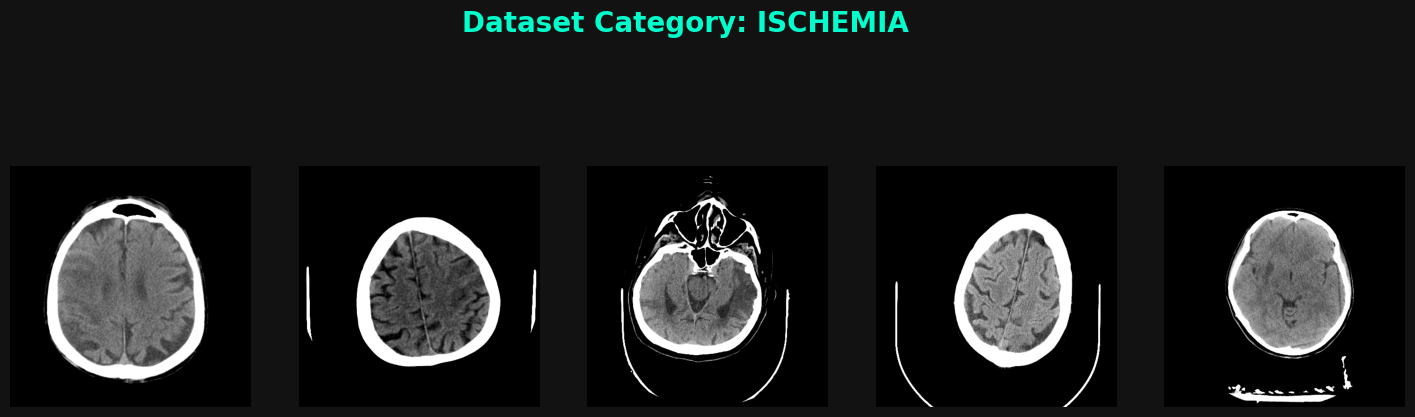

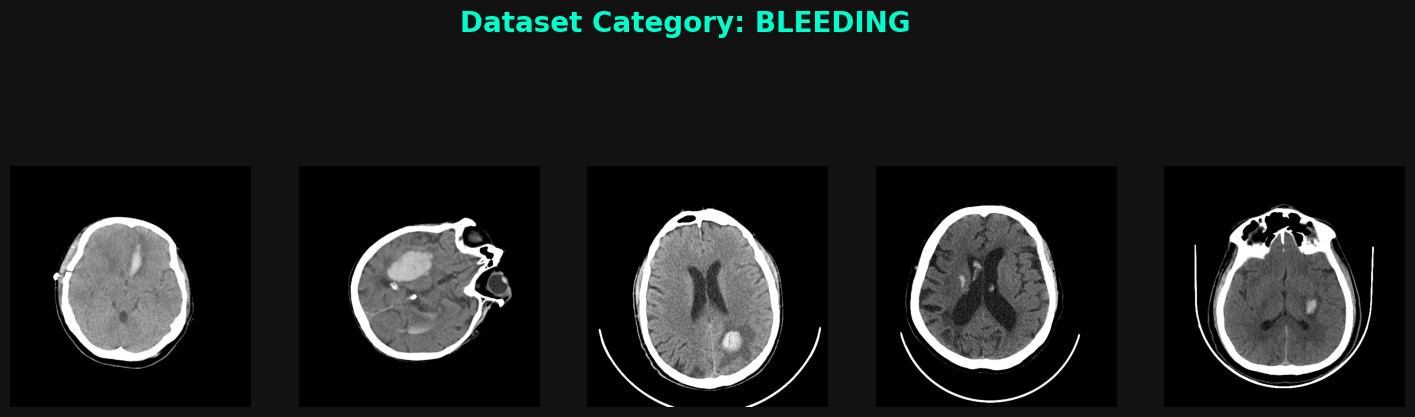

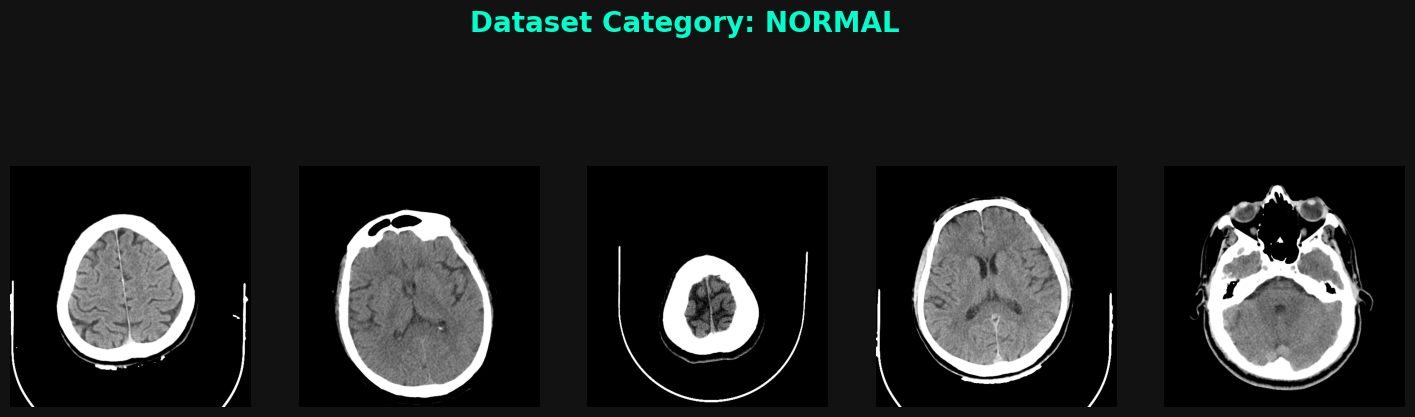

In [4]:
for cls in detection:
    if cls == "External_Test":  
        continue
    folder = os.path.join(path, cls,"PNG")
    images = sorted(os.listdir(folder))

    fig, axes = plt.subplots(1, 5, figsize=(18, 5), facecolor='#121212')
    fig.suptitle(f"Dataset Category: {cls.upper()}",
                 fontsize=20, weight="black", color='#00FFCC', y=1.05)

    for ax, img_name in zip(axes, images[0:0 + 5]):
        img_path = os.path.join(folder, img_name)
        img = cv2.cvtColor(cv2.imread(img_path), cv2.COLOR_BGR2RGB)  
        ax.imshow(img)
        ax.axis('off')  \

    plt.show()


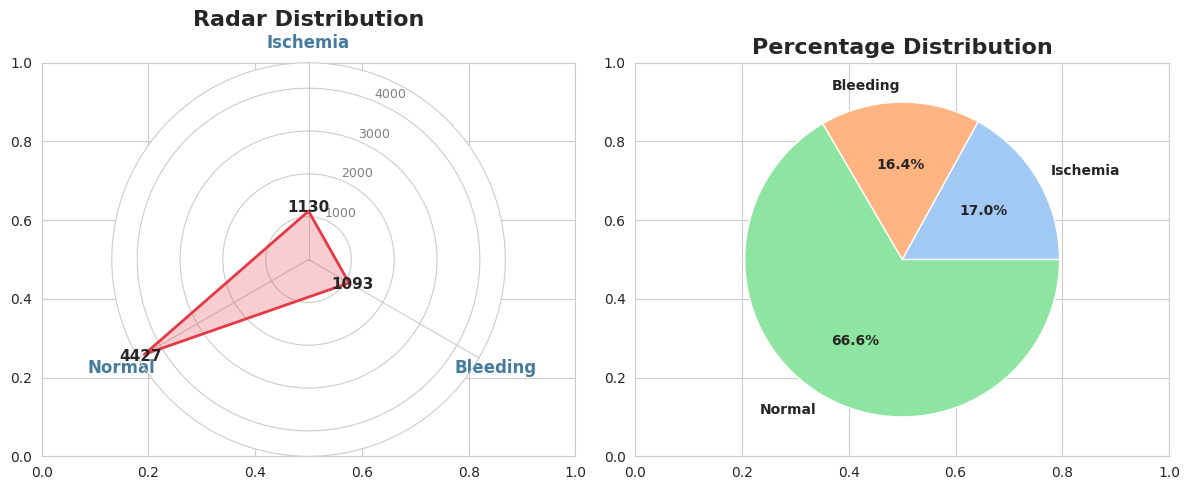

In [5]:

classes = [cls for cls in detection if cls != "External_Test"]
image_counts = [len(os.listdir(os.path.join(path, cls, "PNG"))) for cls in classes]
# Radar
angles = np.linspace(0, 2*np.pi, len(classes), endpoint=False).tolist()
plot_counts = image_counts + [image_counts[0]]
plot_angles = angles + [angles[0]]

sns.set_style("whitegrid")
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5), subplot_kw=dict(polar=False))

ax_r = fig.add_subplot(121, polar=True)
ax_r.set_theta_offset(np.pi/2); ax_r.set_theta_direction(-1)
ax_r.plot(plot_angles, plot_counts, color='#E63946', lw=2)
ax_r.fill(plot_angles, plot_counts, color='#E63946', alpha=0.25)
for i, c in enumerate(image_counts):
    ax_r.text(angles[i], c+max(image_counts)*0.02, str(c), ha='center', va='center', weight='bold', size=11)
ax_r.set_xticks(angles); ax_r.set_xticklabels(classes, fontsize=12, fontweight='bold', color='#457B9D')
plt.yticks(color='grey', size=9); ax_r.set_title("Radar Distribution", size=16, weight='bold')

# Pie 
ax2 = fig.add_subplot(122)
ax2.pie(image_counts, labels=classes, autopct='%1.1f%%', colors=sns.color_palette("pastel"), textprops={'weight':'bold'})
ax2.set_title("Percentage Distribution", size=16, weight='bold')

plt.tight_layout()
plt.show()


<div dir="rtl" style="font-family:'Tahoma';color:#000;border:1px solid #000;border-radius:10px;padding:15px;background-color:#fff;"><h2 style="color:#000;text-align:center;margin-bottom:10px;border-bottom:2px solid #000;padding-bottom:5px;">📊 تحلیل توزیع کلاس‌های دیتاست</h2><table style="width:100%;border-collapse:collapse;color:#000;"><thead><tr style="background-color:#eee;border-bottom:2px solid #000;"><th style="padding:8px;text-align:center;">وضعیت</th><th style="padding:8px;text-align:center;">نام کلاس</th><th style="padding:8px;text-align:center;">تعداد نمونه</th><th style="padding:8px;text-align:center;">سهم از کل</th></tr></thead><tbody><tr style="border-bottom:1px solid #000;"><td style="padding:8px;text-align:center;">✅ اکثریت</td><td style="padding:8px;text-align:center;font-weight:bold;">بدون سکته</td><td style="padding:8px;text-align:center;">۴,۴۲۸</td><td style="padding:8px;width:35%;"><div style="background:#ccc;border-radius:5px;height:12px;width:100%;"><div style="background:#000;height:12px;width:66.5%;border-radius:5px;"></div></div><small>۶۶.۵٪</small></td></tr><tr style="border-bottom:1px solid #000;"><td style="padding:8px;text-align:center;">⚠️ اقلیت</td><td style="padding:8px;text-align:center;font-weight:bold;">ایسکمی (Ischemia)</td><td style="padding:8px;text-align:center;">۱,۱۳۱</td><td style="padding:8px;"><div style="background:#ccc;border-radius:5px;height:12px;width:100%;"><div style="background:#000;height:12px;width:17%;border-radius:5px;"></div></div><small>۱۷٪</small></td></tr><tr style="border-bottom:1px solid #000;"><td style="padding:8px;text-align:center;">⚠️ اقلیت</td><td style="padding:8px;text-align:center;font-weight:bold;">خونریزی (Bleeding)</td><td style="padding:8px;text-align:center;">۱,۰۹۴</td><td style="padding:8px;"><div style="background:#ccc;border-radius:5px;height:12px;width:100%;"><div style="background:#000;height:12px;width:16.5%;border-radius:5px;"></div></div><small>۱۶.۵٪</small></td></tr></tbody></table><div style="margin-top:10px;padding:10px;border:1px solid #000;font-size:0.9em;"><strong>نکته فنی:</strong> به دلیل نامتوازنی، مدل ممکن است به سمت کلاس اکثریت سوگیری کند. استفاده از وزن‌دهی کلاس‌ها (Class Weights) در آموزش MLP توصیه می‌شود.</div></div>

In [26]:
# -------------------------- بارگذاری تصویر --------------------------
img = "/kaggle/input/brain-stroke-ct-dataset/Brain_Stroke_CT_Dataset/Bleeding/PNG/10002.png"
img = cv2.imread(img)
img.shape

(512, 512, 3)

<div dir="rtl" style="font-family:'Tahoma';color:#fff;border:2px solid #2ecc71;border-radius:10px;padding:15px;background-color:#1a1a1a;"><h2 style="color:#2ecc71;text-align:center;margin-bottom:10px;border-bottom:2px solid #2ecc71;padding-bottom:5px;"></h2><table style="width:100%;border-collapse:collapse;color:#fff;text-align:center;"><thead><tr style="background-color:#2ecc71;color:#000;"><th style="padding:10px;border:1px solid #444;">عملیات</th><th style="padding:10px;border:1px solid #444;">توضیحات فنی</th><th style="padding:10px;border:1px solid #444;">ابعاد خروجی</th></tr></thead><tbody><tr><td style="padding:10px;border:1px solid #444;background-color:#2c3e50;"><b>تغییر سایز (Resizing)</b></td><td style="padding:10px;border:1px solid #444;">کاهش از 512x512 به 224x224 برای بهینه‌سازی سرعت شبکه MLP</td><td style="padding:10px;border:1px solid #444;color:#f1c40f;font-weight:bold;">224x224</td></tr><tr><td style="padding:10px;border:1px solid #444;background-color:#2c3e50;"><b>بهبود کنتراست</b></td><td style="padding:10px;border:1px solid #444;">استفاده از CLAHE یا Histogram Equalization برای برجسته‌سازی ضایعات</td><td style="padding:10px;border:1px solid #444;color:#f1c40f;font-weight:bold;">224x224</td></tr></tbody></table></div>

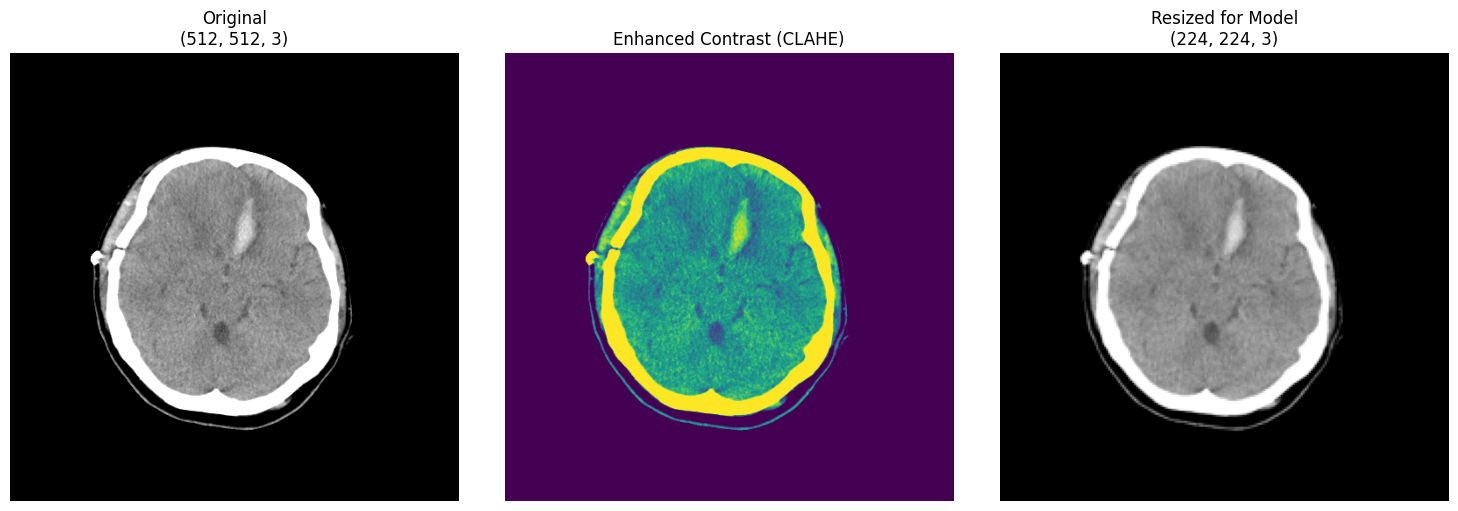

In [27]:
# -------------------------- افزایش کنتراست --------------------------
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
enhanced_img = clahe.apply(img if len(img.shape) == 2 else cv2.cvtColor(img, cv2.COLOR_RGB2GRAY))

# -------------------------- تغییر اندازه --------------------------
resized = cv2.resize(img, (224, 224), interpolation=cv2.INTER_AREA)

# -------------------------- نمایش تصاویر --------------------------
images = [img, enhanced_img, resized] # ارایه برای هز 3 بخش 
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
titles = [f"Original\n{img.shape[:]}",
          "Enhanced Contrast (CLAHE)",
          f"Resized for Model\n{resized.shape[:]}"]
for ax, im, title in zip(axes, images, titles):
    ax.imshow(im)
    ax.set_title(title)
    ax.axis('off')

plt.tight_layout()
plt.show()

<div id="Feature" style="    
    width: 90%; 
    max-width: 400px; 
    margin: 20px auto;
    padding: 18px 10px;
    background: linear-gradient(145deg, #0f0f0f, #151515);
    border-radius: 12px;
    border: 1px solid #4ac200;
    box-shadow: 0 0 20px rgba(74, 194, 0, 0.2), inset 0 0 5px rgba(74, 194, 0, 0.1);   
    color: #4ac200;
    text-align: center;
    font-family: 'Segoe UI', system-ui, -apple-system, sans-serif;
    font-size: clamp(18px, 5vw, 24px); /* فونت هوشمند که با سایز صفحه تغییر میکند */
    font-weight: 800;
    text-transform: uppercase;
    letter-spacing: 3px;
    text-shadow: 0 0 10px rgba(74, 194, 0, 0.5);   
    position: relative;
    overflow: hidden;
">
    <div style="position: absolute; top: 0; left: 50%; transform: translateX(-50%); width: 40%; height: 2px; background: #4ac200; box-shadow: 0 0 10px #4ac200;"></div>   
MLP model
</div>

In [7]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [7]:
my_list = []
for class_name in detection :
    class_path = os.path.join(path, class_name,"PNG")
    files = os.listdir(class_path)
    for file in files :
        file_path = os.path.join(class_path, file)
        my_list.append((file_path, class_name))

# Convert the list to a pandas DataFrame
df = pd.DataFrame(my_list, columns=['file_path', 'label'])

# Shuffle the dataframe rows
df = df.sample(frac=1).reset_index(drop=True)
display(df["label"].value_counts())
df.head()

label
Normal      4427
Ischemia    1130
Bleeding    1093
Name: count, dtype: int64

,file_path,label
0,/kaggle/input/brain-stroke-ct-dataset/Brain_St...,Ischemia
1,/kaggle/input/brain-stroke-ct-dataset/Brain_St...,Normal
2,/kaggle/input/brain-stroke-ct-dataset/Brain_St...,Normal
3,/kaggle/input/brain-stroke-ct-dataset/Brain_St...,Normal
4,/kaggle/input/brain-stroke-ct-dataset/Brain_St...,Ischemia


In [8]:
train_df, temp_df = train_test_split(
    df,
    test_size=0.3,
    random_state=42,
    stratify=df["label"]
)

valid_df, test_df = train_test_split(
    temp_df,
    test_size=0.5,
    random_state=42,
    stratify=temp_df["label"]
)

In [9]:
dataset_size = len(df)  
batch_size = max(16, min(128, dataset_size // 100))
print(batch_size)


66


افزایش کنراست 

In [10]:
def apply_clahe(img):
    img = img.astype("uint8")
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
    enhanced = clahe.apply(gray)
    # برگردوندن به 3 کانال تا با مدل هماهنگ باشه
    enhanced = cv2.cvtColor(enhanced, cv2.COLOR_GRAY2RGB)
    return enhanced / 255.0

In [12]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [13]:
# Set the image size and batch size
image_size = (224, 224)
batch_size = 64
datagen = ImageDataGenerator(
    preprocessing_function=apply_clahe
)
# Create a generator for the training data
Train = datagen.flow_from_dataframe(
    train_df,
    x_col='file_path',
    y_col='label',
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=True
)

# Create a generator for the validation data
Validation = datagen.flow_from_dataframe(
    valid_df,
    x_col='file_path',
    y_col='label',
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

# Create a generator for the test data
Test = datagen.flow_from_dataframe(
    test_df,
    x_col='file_path',
    y_col='label',
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

Found 4655 validated image filenames belonging to 3 classes.
Found 997 validated image filenames belonging to 3 classes.
Found 998 validated image filenames belonging to 3 classes.


In [14]:
print(Train.class_indices)


{'Bleeding': 0, 'Ischemia': 1, 'Normal': 2}


<div style="direction: rtl; font-family: Tahoma, Arial, sans-serif; line-height: 1.8; 
            border: 2px solid #4A90E2; border-radius: 12px; padding: 25px; 
            background-color: #f9fbfd; color: #333; max-width: 800px; margin: 20px auto;">
    <h2 style="color: #2c3e50; border-bottom: 2px solid #4A90E2; padding-bottom: 10px;">
        بررسی تابع Softmax
    </h2>
    <!-- کاربرد -->
    <div style="padding: 15px; background: #fff; border-right: 5px solid #4A90E2; 
                border-radius: 4px; margin-bottom: 20px;">
        <h3 style="color: #e67e22;">۱. کاربرد</h3>
        <p>Softmax معمولاً در <strong>لایه خروجی</strong> شبکه عصبی قرار می‌گیرد 
           و اعداد خام (Logits) را به <strong>احتمال هر کلاس</strong> تبدیل می‌کند.</p>
        <ul>
            <li>خروجی هر کلاس بین <strong>0 و 1</strong> است.</li>
            <li>مجموع تمام خروجی‌ها دقیقاً برابر با <strong>1</strong> می‌شود.</li>
        </ul>
    </div>
    <!-- فرمول -->
    <div style="padding: 15px; background: #fff; border-right: 5px solid #8e44ad; 
                border-radius: 4px; margin-bottom: 20px;">
        <h3 style="color: #8e44ad;">۲. فرمول Softmax</h3>
        <img src="https://assets-global.website-files.com/5d7b77b063a9066d83e1209c/60d24ae385bcde8513aeb8c4_pasted%20image%200%20%2815%29.jpg" 
             style="max-width: 100%; border-radius: 8px; margin: 10px 0; display: block;">
        <div style="direction: ltr; background: #eee; padding: 10px; border-radius: 5px; 
                    text-align: center; font-weight: bold; font-family: serif; font-size: 1.2em;">
            σ(z)ᵢ = e^(zᵢ) / Σⱼ e^(zⱼ)
        </div>
        <ul>
            <li><strong>zᵢ</strong> = عدد خام (Logit) برای کلاس i</li>
            <li><strong>Σⱼ e^(zⱼ)</strong> = مجموع نمایی تمام کلاس‌ها</li>
            <li><strong>σ(z)ᵢ</strong> = احتمال پیش‌بینی مدل برای کلاس i</li>
        </ul>
    </div>
    <!-- توضیح ساده -->
    <div style="padding: 15px; background: #fff; border-right: 5px solid #27ae60; 
                border-radius: 4px; margin-bottom: 20px;">
        <h3 style="color: #27ae60;">۳. توضیح ساده</h3>
        <p>
            - هر عدد خام zᵢ با e^(zᵢ) تبدیل می‌شود تا همه مقادیر <strong>مثبت</strong> شوند.<br>
            - سپس بر مجموع e^(zⱼ) تقسیم می‌شود تا جمع کل = <strong>۱</strong> شود.<br>
            - نتیجه: یک <strong>توزیع احتمال</strong> روی همه کلاس‌ها.
        </p>
        <div style="background: #eafaf1; padding: 10px; border-radius: 6px; 
                    direction: ltr; font-family: monospace;">
            logits = [1, 2, 3]  →  Softmax ≈ [0.09, 0.24, 0.67]  →  sum = 1.0 ✓
        </div>
        <br>
        <p><strong>دلایل استفاده از exp:</strong></p>
        <ul>
            <li>احتمال نمی‌تواند منفی باشد.</li>
            <li>اختلاف‌ها را تقویت می‌کند.</li>
        </ul>
    </div>
    <!-- Cross Entropy -->
    <div style="padding: 15px; background: #fff; border-right: 5px solid #e74c3c; 
                border-radius: 4px;">
        <h3 style="color: #e74c3c;">۴. تابع Cross-Entropy (هزینه)</h3>
        <p>این تابع به عنوان <strong>تابع هزینه (Loss Function)</strong> عمل می‌کند 
           و تفاوت بین پیش‌بینی مدل و مقادیر واقعی (Label) را اندازه می‌گیرد.</p>
        <div style="direction: ltr; background: #eee; padding: 10px; border-radius: 5px; 
                    text-align: center; font-weight: bold; font-family: serif; font-size: 1.2em;">
            L = -Σ yᵢ log(ŷᵢ)
        </div>
        <p style="margin-top: 10px;">هرچه پیش‌بینی مدل به واقعیت نزدیک‌تر باشد، 
           مقدار این تابع <strong>کمتر</strong> خواهد بود.</p>
    </div>

</div>


In [28]:
# ==========================================================
# activtion function
# ==========================================================
import numpy as np

# ----------------------
# ReLU
# ----------------------
# def relu(x):
#     return np.maximum(0, x)

# def relu_derivative(x):
#     return (x > 0).astype(float)

# # ----------------------
# # Sigmoid
# # ----------------------
# def sigmoid(x):
#     return 1 / (1 + np.exp(-x))

# def sigmoid_derivative(x):
#     s = sigmoid(x)
#     return s * (1 - s)

# # ----------------------
# # Tanh
# # ----------------------
# def tanh(x):
#     return np.tanh(x)

# def tanh_derivative(x):
#     t = np.tanh(x)
#     return 1 - t**2

# # ----------------------
# # Swish
# # ----------------------
# def swish(x):
#     return x * sigmoid(x)

# def swish_derivative(x):
#     s = sigmoid(x)
#     return s + x * s * (1 - s)


# ==========================================================
# ==========================================================
# تابع Softmax برای خروجی دسته‌بندی
def one_hot(y, num_classes):
    return np.eye(num_classes)[y]
def softmax(x):
    exp_x = np.exp(x - np.max(x, axis=1, keepdims=True))
    return exp_x / np.sum(exp_x, axis=1, keepdims=True)
print("softmax✅")
# تابع Loss: Cross-Entropy
def cross_entropy(y_true, y_pred):
    m = y_true.shape[0]
    return -np.sum(y_true * np.log(y_pred + 1e-9)) / m
print("cross_entropy✅")

softmax✅
cross_entropy✅


In [16]:
# ==========================================================
# Layers - تعریف لایه‌ها
# ==========================================================
# Flatten: تبدیل ورودی چندبعدی به 2 بعدی (batch_size, features)
class Flatten:
    def forward(self, x):
        self.input_shape = x.shape
        return x.reshape(x.shape[0], -1)

    def backward(self, grad_output):
        return grad_output.reshape(self.input_shape)


# Dense: لایه کاملاً متصل + به‌روزرسانی Adam
class Dense:
    def __init__(self, in_features, out_features):
        # He initialization
        self.W = np.random.randn(in_features, out_features) * np.sqrt(2. / in_features)
        self.b = np.zeros((1, out_features))

        # Adam state (مقادیر اولیه برای Momentum و RMSProp)
        self.mW = np.zeros_like(self.W)
        self.vW = np.zeros_like(self.W)
        self.mb = np.zeros_like(self.b)
        self.vb = np.zeros_like(self.b)

    # Forward Pass
    def forward(self, x):
        self.input = x
        self.z = np.dot(x, self.W) + self.b
        return self.z

    # Backward Pass
    def backward(self, grad_output):
        m = self.input.shape[0]
        self.dW = np.dot(self.input.T, grad_output) / m
        self.db = np.sum(grad_output, axis=0, keepdims=True) / m
        return np.dot(grad_output, self.W.T)

    # Update با Adam
    def update(self, lr, t, beta1=0.9, beta2=0.999, eps=1e-8):
        self.mW = beta1 * self.mW + (1 - beta1) * self.dW
        self.vW = beta2 * self.vW + (1 - beta2) * (self.dW ** 2)
        self.mb = beta1 * self.mb + (1 - beta1) * self.db
        self.vb = beta2 * self.vb + (1 - beta2) * (self.db ** 2)

        # Bias correction
        mW_hat = self.mW / (1 - beta1 ** t)
        vW_hat = self.vW / (1 - beta2 ** t)
        mb_hat = self.mb / (1 - beta1 ** t)
        vb_hat = self.vb / (1 - beta2 ** t)

        # آپدیت پارامترها
        self.W -= lr * mW_hat / (np.sqrt(vW_hat) + eps)
        self.b -= lr * mb_hat / (np.sqrt(vb_hat) + eps)



In [17]:
# Mapping برای انتخاب فعال‌ساز
activation_funcs = {
    "linear": (linear, linear_derivative),
    "relu": (relu, relu_derivative),
    "sigmoid": (sigmoid, sigmoid_derivative),
    "tanh": (tanh, tanh_derivative),
    "swish": (swish, swish_derivative),
}

# ==========================================================
# MLP با فعال‌ساز قابل انتخاب
# ==========================================================
class MLP:
    def __init__(self, input_shape, num_classes, activations=None):
        flat_dim = np.prod(input_shape)
        self.flatten = Flatten()
        self.l1 = Dense(flat_dim, 512)
        self.l2 = Dense(512, 256)
        self.l2 = Dense(512, 256)
        self.l2 = Dense(512, 256)
        self.l2 = Dense(512, 256)
        self.l2 = Dense(512, 256)
        self.l2 = Dense(512, 256)
        self.l2 = Dense(512, 256)
        self.l2 = Dense(512, 256)
        self.l2 = Dense(512, 256)
        self.l3 = Dense(256, 128)
        self.l4 = Dense(128, num_classes)  # خروجی softmax
        
        self.layers = [self.l1, self.l2, self.l3, self.l4]

        # فعال‌ساز هر لایه پنهان، default = ReLU
        if activations is None:
            activations = ["relu", "relu", "relu"]
        self.activations = []
        self.activation_derivatives = []
        for act_name in activations:
            func, deriv = activation_funcs.get(act_name.lower(), (relu, relu_derivative))
            self.activations.append(func)
            self.activation_derivatives.append(deriv)

    # Forward Pass
    def forward(self, x):
        x = self.flatten.forward(x)

        # لایه 1
        x = self.l1.forward(x)
        x = self.activations[0](x)

        # لایه 2
        x = self.l2.forward(x)
        x = self.activations[1](x)

        # لایه 3
        x = self.l3.forward(x)
        x = self.activations[2](x)

        # لایه خروجی
        x = self.l4.forward(x)
        x = softmax(x)

        return x

    # Backward Pass
    def backward(self, y_true, y_pred):
        grad = (y_pred - y_true)  # softmax + CE derivative

        grad = self.l4.backward(grad)

        # لایه 3
        grad = self.activation_derivatives[2](self.l3.z) * grad
        grad = self.l3.backward(grad)

        # لایه 2
        grad = self.activation_derivatives[1](self.l2.z) * grad
        grad = self.l2.backward(grad)

        # لایه 1
        grad = self.activation_derivatives[0](self.l1.z) * grad
        grad = self.l1.backward(grad)

        grad = self.flatten.backward(grad)

    # Update همه لایه‌ها
    def update(self, lr, t):
        for layer in self.layers:
            layer.update(lr, t)

In [18]:

# ==========================================================
# Training Loop - آموزش با Mini-batch + Adam
# ==========================================================
def train(model, X, y, epochs=1, batch_size=32, lr=0.001):
    y = one_hot(y, np.max(y) + 1)
    n = X.shape[0]
    t = 0  # Adam timestep

    for epoch in range(epochs):

        # Shuffle داده‌ها
        indices = np.random.permutation(n)
        X = X[indices]
        y = y[indices]

        # Mini-batch
        for i in range(0, n, batch_size):
            t += 1
            X_batch = X[i:i+batch_size]
            y_batch = y[i:i+batch_size]

            y_pred = model.forward(X_batch)
            model.backward(y_batch, y_pred)
            model.update(lr, t)

        # Evaluate روی کل داده‌ها
        y_pred_full = model.forward(X)
        loss = cross_entropy(y, y_pred_full)
        acc = np.mean(np.argmax(y_pred_full, axis=1) == np.argmax(y, axis=1))

        print(f"Epoch {epoch+1} | Loss: {loss:.4f} | Acc: {acc:.4f}")

In [19]:
# ==========================================================
# Summary Function - نمایش تعداد پارامترها
# ==========================================================
def mlp_summary(model):
    total_params = 0
    for i, layer in enumerate(model.layers, 1):
        if isinstance(layer, Dense):
            params = layer.W.size + layer.b.size
            total_params += params
            print(f"Layer {i}: Dense | input: {layer.W.shape[0]} | output: {layer.W.shape[1]} | params: {params}")
    print(f"Total params: {total_params}")


# ==========================================================
# ایجاد مدل و نمایش Summary
# ==========================================================
input_shape = (224, 224, 3)
num_classes = 3  # تعداد کلاس‌ها
model = MLP(input_shape=input_shape, num_classes=num_classes)

mlp_summary(model)

Layer 1: Dense | input: 150528 | output: 512 | params: 77070848
Layer 2: Dense | input: 512 | output: 256 | params: 131328
Layer 3: Dense | input: 256 | output: 128 | params: 32896
Layer 4: Dense | input: 128 | output: 3 | params: 387
Total params: 77235459


In [20]:
class NumpyGradientLogger:
    def __init__(self):
        self.epoch_gradients = []
        self.stats = []

    def log(self, model, epoch):
        kernel_grads = []
        layer_norms = []

        for layer in model.layers:
            if isinstance(layer, Dense):
                grad = layer.dW
                if grad is not None:
                    norm = np.linalg.norm(grad)
                    layer_norms.append(norm)
                    kernel_grads.append(grad)

        self.epoch_gradients.append(layer_norms)

        if len(kernel_grads) >= 2:
            first = kernel_grads[0]
            last = kernel_grads[-1]

            first_mean = np.mean(np.abs(first))
            last_mean = np.mean(np.abs(last))
            first_l2 = np.linalg.norm(first)
            last_l2 = np.linalg.norm(last)
            last_var = np.var(last)
            last_max = np.max(np.abs(last))
            vanishing_ratio = first_mean / (last_mean + 1e-12)

            self.stats.append({
                "epoch": epoch + 1,
                "first_mean": first_mean,
                "last_mean": last_mean,
                "first_l2": first_l2,
                "last_l2": last_l2,
                "last_variance": last_var,
                "last_max": last_max,
                "vanishing_ratio": vanishing_ratio
            })

In [20]:
import time
# تعداد کلاس‌ها از generator
num_classes = len(Train.class_indices)

input_shape = (224, 224, 3)

# ساخت مدل
model = MLP(input_shape=input_shape, num_classes=num_classes)
# ساخت مدل MLP با ابعاد ورودی و تعداد کلاس‌ها
model = MLP(input_shape=input_shape, num_classes=num_classes)
def train_numpy_mlp(model, generator, val_generator=None, epochs=1, lr=0.001):
    logger = NumpyGradientLogger()
    total_batches = len(generator) * epochs
    batch_counter = 0
    start_time = time.time()

    for epoch in range(epochs):
        print(f"\nEpoch {epoch+1}/{epochs}")
        epoch_start = time.time()

        for step in range(len(generator)):
            X_batch, y_batch = generator[step]
            y_batch_onehot = one_hot(np.argmax(y_batch, axis=1), y_batch.shape[1])

            # forward
            y_pred = model.forward(X_batch)
            # backward
            model.backward(y_batch_onehot, y_pred)
            # update
            model.update(lr, t=step+1)

            # بروزرسانی شمارنده batch و نمایش زمان تقریبی
            batch_counter += 1
            elapsed = time.time() - start_time
            batches_left = total_batches - batch_counter
            eta = (elapsed / batch_counter) * batches_left
            print(f"\rBatch {batch_counter}/{total_batches} | Elapsed: {elapsed:.1f}s | ETA: {eta:.1f}s", end='')

        # log gradient stats
        logger.log(model, epoch)

        # evaluate training set (optional)
        total_X = np.concatenate([generator[i][0] for i in range(len(generator))], axis=0)
        total_y = np.concatenate([generator[i][1] for i in range(len(generator))], axis=0)
        total_y_onehot = one_hot(np.argmax(total_y, axis=1), total_y.shape[1])
        y_pred_full = model.forward(total_X)
        loss = cross_entropy(total_y_onehot, y_pred_full)
        acc = np.mean(np.argmax(y_pred_full, axis=1) == np.argmax(total_y_onehot, axis=1))
        epoch_time = time.time() - epoch_start
        print(f"\nEpoch {epoch+1} finished in {epoch_time:.1f}s | Loss: {loss:.4f} | Acc: {acc:.4f}")

    total_time = time.time() - start_time
    print(f"\nTraining finished in {total_time:.1f}s")
    return logger


logger = train_numpy_mlp(
    model=model,
    generator=Train,
    val_generator=Validation,
    epochs=2,
    lr=0.001
)

# مشاهده stats گرادیان‌ها
print("\nGradient stats for each epoch:")
for s in logger.stats:
    print(s)


Epoch 1/2
Batch 73/146 | Elapsed: 136.2s | ETA: 136.2s
Epoch 1 finished in 175.6s | Loss: 1.6050 | Acc: 0.6750

Epoch 2/2
Batch 80/146 | Elapsed: 185.3s | ETA: 152.8s
Epoch 2 finished in 138.1s | Loss: 0.7231 | Acc: 0.7959

Training finished in 313.7s

Gradient stats for each epoch:
{'epoch': 1, 'first_mean': np.float64(0.0004153402235025666), 'last_mean': np.float64(1.004632595811817), 'first_l2': np.float64(8.130116728478383), 'last_l2': np.float64(26.4492973389964), 'last_variance': np.float64(1.8217847128297973), 'last_max': np.float64(4.6485086558104705), 'vanishing_ratio': np.float64(0.0004134249926128743)}
{'epoch': 2, 'first_mean': np.float64(0.0001032992884120194), 'last_mean': np.float64(0.4135028453695074), 'first_l2': np.float64(2.1169611743186585), 'last_l2': np.float64(10.80701534698015), 'last_variance': np.float64(0.3041447414319387), 'last_max': np.float64(1.9689717858527287), 'vanishing_ratio': np.float64(0.0002498151816088739)}


In [21]:
all_preds = []
all_true = []

for i in range(len(Test)):
    X_batch, y_batch = Test[i]
    
    y_pred = model.forward(X_batch)  
    preds = np.argmax(y_pred, axis=1)
    true = np.argmax(y_batch, axis=1)
    
    all_preds.append(preds)
    all_true.append(true)

y_pred_bool = np.concatenate(all_preds)
y_true = np.concatenate(all_true)

from sklearn.metrics import classification_report

clf_report = classification_report(
    y_true,
    y_pred_bool,
    target_names=list(Train.class_indices.keys())
)

print(clf_report)

              precision    recall  f1-score   support

    Bleeding       0.69      0.56      0.62       164
    Ischemia       0.50      0.48      0.49       170
      Normal       0.81      0.85      0.83       664

    accuracy                           0.74       998
   macro avg       0.66      0.63      0.64       998
weighted avg       0.73      0.74      0.74       998



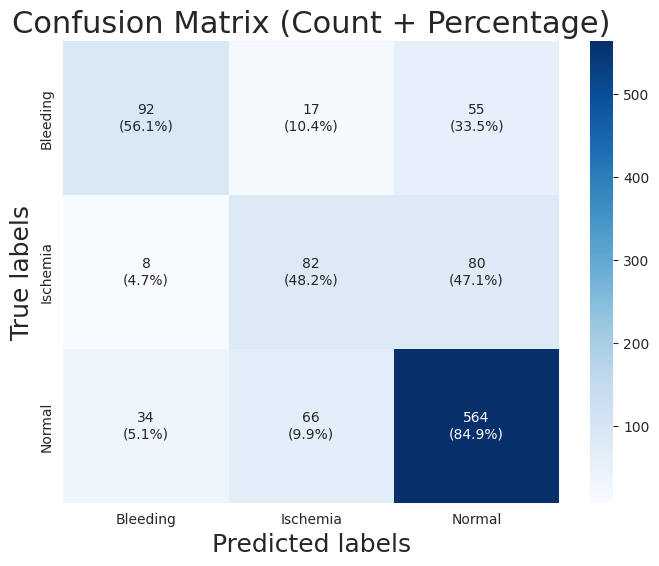

[[ 92  17  55]
 [  8  82  80]
 [ 34  66 564]]
[164 170 664]


In [22]:
def plot_confusion_matrix(y_test, y_pred, labels):
    cm = confusion_matrix(y_test, y_pred)

    cm_normalized = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis]

    annot_text = np.empty_like(cm).astype(str)

    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            annot_text[i, j] = f"{cm[i, j]}\n({cm_normalized[i, j]*100:.1f}%)"

    plt.figure(figsize=(8, 6))
    ax = sns.heatmap(cm,
                     annot=annot_text,
                     fmt='',
                     cmap="Blues")

    ax.set_xlabel('Predicted labels', fontsize=18)
    ax.set_ylabel('True labels', fontsize=18)
    ax.set_title('Confusion Matrix (Count + Percentage)', fontsize=22)

    ax.xaxis.set_ticklabels(labels)
    ax.yaxis.set_ticklabels(labels)

    plt.show()
    print(cm)
    print(cm.sum(axis=1))
labels = sorted(Test.class_indices, key=Test.class_indices.get)

plot_confusion_matrix(y_true, y_pred_bool, labels)

# بررسی گرادیان هاش 

Index(['epoch', 'first_mean', 'last_mean', 'first_l2', 'last_l2',
       'last_variance', 'last_max', 'vanishing_ratio'],
      dtype='str')


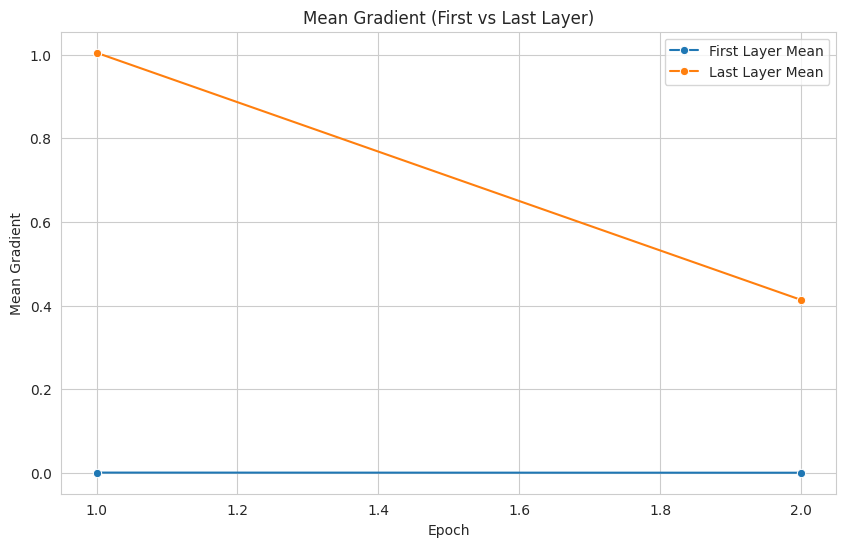

In [23]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

grad_df = pd.DataFrame(logger.stats)

# بررسی ستون‌ها
print(grad_df.columns)

# تنظیم اندازه شکل
plt.figure(figsize=(10,6))

# رسم خطوط با seaborn
sns.lineplot(data=grad_df, x="epoch", y="first_mean", label="First Layer Mean", marker="o")
sns.lineplot(data=grad_df, x="epoch", y="last_mean", label="Last Layer Mean", marker="o")

plt.title("Mean Gradient (First vs Last Layer)")
plt.xlabel("Epoch")
plt.ylabel("Mean Gradient")
plt.legend()
plt.grid(True)
plt.show()

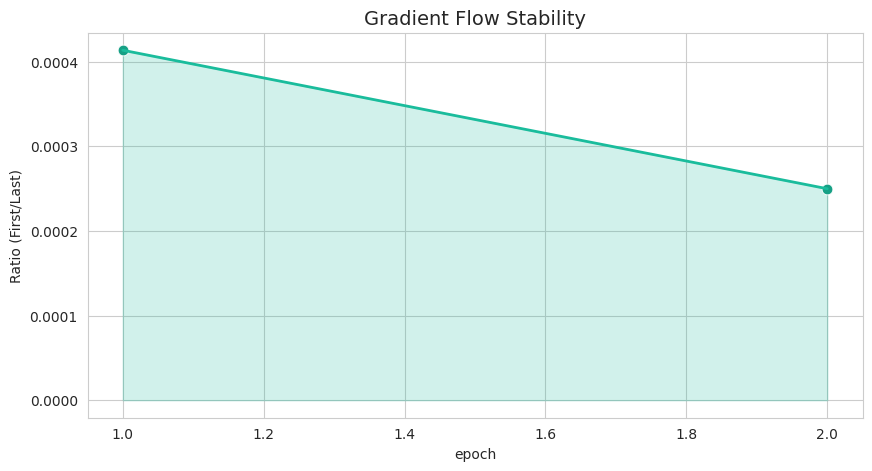

In [24]:
plt.figure(figsize=(10, 5))

# رسم خط
sns.lineplot(data=grad_df, x="epoch", y="vanishing_ratio", color="#1ABC9C", linewidth=2)

# پر کردن زیر نمودار برای جذابیت بصری و درک بهتر حجم
plt.fill_between(grad_df["epoch"], grad_df["vanishing_ratio"], color="#1ABC9C", alpha=0.2)

# اضافه کردن نقاط به صورت جداگانه برای کنترل بیشتر
sns.scatterplot(data=grad_df, x="epoch", y="vanishing_ratio", color="#16A085", s=60)

plt.title("Gradient Flow Stability", fontsize=14)
plt.ylabel("Ratio (First/Last)")
plt.show()

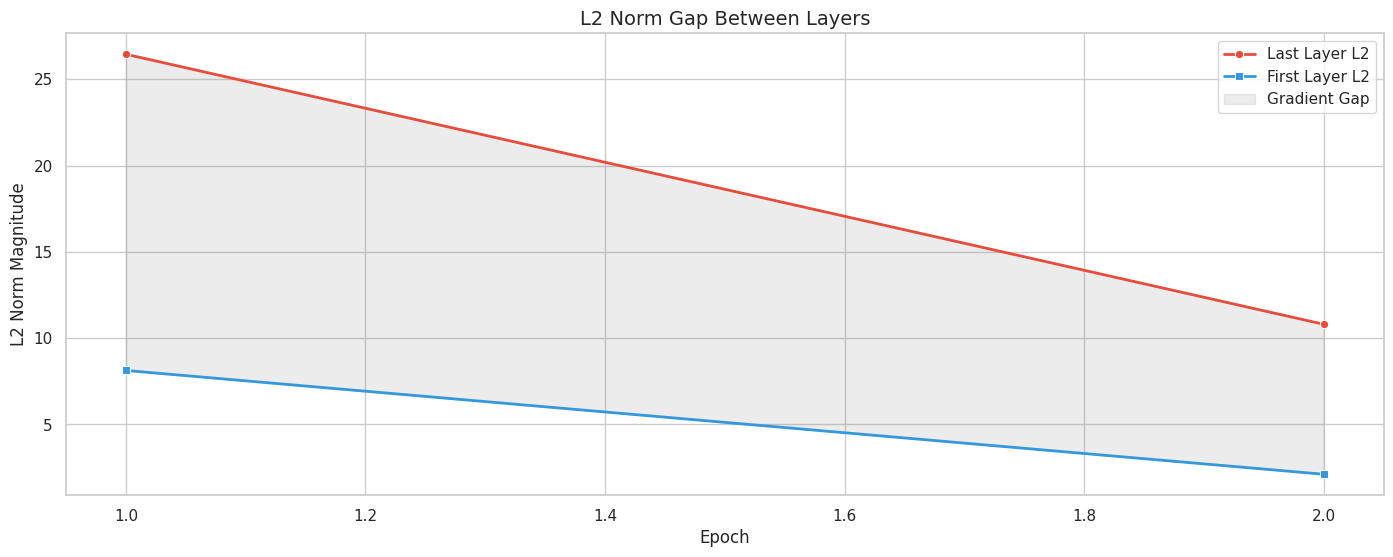

In [25]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="whitegrid")

# تبدیل داده‌ها به فرمت مناسب برای Seaborn
df_melted = grad_df.melt(
    id_vars=['epoch'], 
    value_vars=['first_l2', 'last_l2'], 
    var_name='Layer', 
    value_name='L2_Norm'
)

# تغییر نام‌ها برای نمایش زیباتر در راهنما
df_melted['Layer'] = df_melted['Layer'].replace({'first_l2': 'First Layer L2', 'last_l2': 'Last Layer L2'})
plt.figure(figsize=(17, 6))

# رسم خطوط
sns.lineplot(data=grad_df, x="epoch", y="last_l2", label="Last Layer L2", color="#E74C3C", linewidth=2, marker="o")
sns.lineplot(data=grad_df, x="epoch", y="first_l2", label="First Layer L2", color="#3498DB", linewidth=2, marker="s")

# پر کردن فاصله بین دو لایه برای نشان دادن "افت گرادیان"
plt.fill_between(grad_df["epoch"], grad_df["first_l2"], grad_df["last_l2"], color="gray", alpha=0.15, label="Gradient Gap")

plt.title("L2 Norm Gap Between Layers", fontsize=14)
plt.xlabel("Epoch")
plt.ylabel("L2 Norm Magnitude")
plt.legend()
plt.show()